### Things I had to do in the terminal before being able to use this notebook


### Use conda to build Python env with osmnx as main so that not upto date version in dependancies used but workable for osmnx

conda config --prepend channels conda-forge

conda create -n ox --strict-channel-priority osmnx

### go into env
conda activate ox

### install other libs that are needed for visulization
conda install matplotlib
conda install numpy
conda install -c anaconda ipykernel

### makes conda env into a kernel which then can be used by jupyter notebook
python -m ipykernel install --user --name=ox

### other Tool for queries to OpenStreetMap in testing phase
pip install OSMPythonTools


# Notebook for all areas new in the gerda model mostly for vizualisation and see where loactions come from

In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

In [2]:
# Specify the name that is used to seach for the data
place_name_1 = "Heinsberg, Nordrhein-Westfalen, Germany"
place_name_2 = "Gangelt, Kreis Heinsberg, Nordrhein-Westfalen, Germany"
place_name_3 = "Penkridge, South Staffordshire, Staffordshire, West Midlands, England, ST19 5DJ, Vereinigtes Königreich"
place_name_4 = "Epping, Essex, East of England, England, CM16 4BD, Vereinigtes Königreich"
place_name_5 = "Stratford-upon-Avon, Warwickshire, West Midlands, England, CV37 6AH, Vereinigtes Königreich"
place_name_6 = "Charlottenlund"
place_name_7 = "Helsingör, Helsingør Municipality, Hauptstadtregion, 3000, Dänemark"
place_name_8 = "Bornholms Regionskommune, Hauptstadtregion, Dänemark"
place_name_9 = "Bad Feilnbach, Landkreis Rosenheim, Bayern, 83075, Germany"
#not working for me actually 8892, 7days incidence = 34.74 2.11.2020
place_name_10 = "Bockhorn, Landkreis Friesland, Niedersachsen, 26345, Germany"
#agents: 7399 actually 12431, 7days incidence = 46.7 3.11.2020 
place_name_11 = "Hessisch Lichtenau, Werra-Meißner-Kreis, Regierungsbezirk Kassel, Hessen, 37235, Germany"
#agents: 7447 actually 8242 , 7days incidence = 52.0 3.11.2020
place_name_12 = "Oranienbaum-Wörlitz, Wittenberg, Sachsen-Anhalt, 06785, Germany"
#agents: 9548 actually 9882, 7days incidence = 149.0 2.11.2020
place_name_13 = "Linsengericht, Main-Kinzig-Kreis, Hessen, 63589, Germany"
#agents: 9339 actually 9954, 7days incidence = 287.2 2.11.2020
place_name_14 = "Simbach a.Inn, Landkreis Rottal-Inn, Bayern, 84359, Germany"

In [3]:
# definied center of neihbourhoods - freely choosen 
list_of_n_1 = [Point(6.1,51.06),Point(6.075,51.05),Point(6.145,51.035),Point(6.07,51.10)] 
list_of_n_2 = [Point(5.99,51.03),Point(6.05,51.01),Point(6.04,50.98),Point(5.99,50.99)]
list_of_n_3 = [Point(-2.08,52.42)]
list_of_n_4 = [Point(0.06,51.41)]
list_of_n_5 = [Point(-1.70,52.19)]
list_of_n_6 = [Point(12.57,55.76)]
list_of_n_7 = [Point(12.60,56.03)]
list_of_n_8 = [Point(14.88,55.11)]
list_of_n_9 = [Point(47.7728352, 12.0062484),Point(47.7973373, 11.9747759),Point( 47.7610224, 12.0510184)]
list_of_n_10 = [Point(8.0172, 53.39422),Point(7.99973, 53.3675)]
list_of_n_11 = [Point(9.70088,51.22621),Point(9.69110,51.21141),Point(9.72293,51.19661),Point(9.76303,51.17931),Point(9.79662,51.21392),Point(9.82794,51.20514),Point(9.64599,51.19812)]
list_of_n_12 = [Point(12.42153,51.84190),Point(12.40572,51.79565),Point(12.34469,51.80463),Point(12.35341,51.84544)]
list_of_n_13 = [Point(9.17492,50.16440),Point(9.18954,50.15995),Point(9.21508,50.17192),Point(9.23338,50.18020),Point(9.19677,50.18895),Point(9.19646,50.14921)]
list_of_n_14 = [Point(13.00774,48.273556),Point(13.008913,48.260859),Point(13.020287,48.2657),Point(13.031493,48.27723),Point(13.04637,48.275227)]


In [4]:
places = {1: [place_name_1,list_of_n_1],
          2: [place_name_2,list_of_n_2],
          3: [place_name_3,list_of_n_3],
          4: [place_name_4,list_of_n_4],
          5: [place_name_5,list_of_n_5],
          6: [place_name_6,list_of_n_6],
          7: [place_name_7,list_of_n_7],
          8: [place_name_8,list_of_n_8],
          9: [place_name_9,list_of_n_9],
          10: [place_name_10,list_of_n_10],
          11: [place_name_11,list_of_n_11],
          12: [place_name_12,list_of_n_12],
          13: [place_name_13,list_of_n_13],
          14: [place_name_14,list_of_n_14]
         }

In [5]:
picked = 12

In [6]:
# Fetch OSM street network from the location
graph = ox.graph_from_place(places[picked][0])


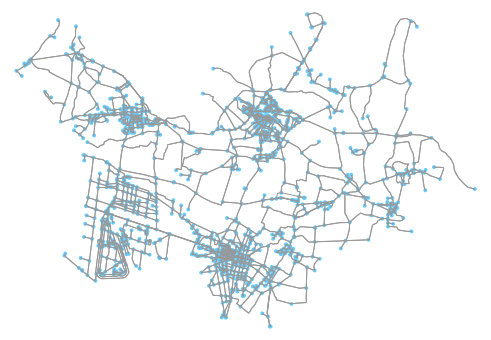

In [7]:
# Plot the streets
fig, ax = ox.plot_graph(graph)


Link for amenities:
https://wiki.openstreetmap.org/wiki/Key:amenity#Healthcare

In [8]:
#new query for all buildings in place of interest data similar but not identical...
buildings = ox.footprints_from_place(places[picked][0])
#separation to get all shops for nicer visualization
shop = buildings[buildings['shop'].notnull()]


In [9]:
#col_names has all the important building information columns that could be of interest for gerda
col_names=['amenity','shop','building','leisure', 'sport', 'office']
list_cols=[]
#loop to find the columns actually in buildings dataframe and their unique value
for x in col_names:
    try:
        blup = buildings[buildings[x].notnull()]
        if isinstance(blup[x].iloc[0], list ) | isinstance(blup[x].iloc[0], dict ):
            continue
        print(str(x)+' = '+str(list(blup[x].unique())))
        list_cols.append(x)
    except:
        continue
print(list_cols)

amenity = ['place_of_worship', 'townhall', 'bank', 'restaurant', 'cafe', 'school', 'police', 'fire_station', 'bicycle_parking', 'toilets', 'fast_food', 'shelter']
shop = ['supermarket']
building = ['retail', 'yes', 'church', 'industrial', 'office', 'manufacture', 'temple', 'house', 'school', 'sports_hall', 'apartments', 'residential', 'garages', 'chapel', 'ruins', 'civic', 'farm_auxiliary', 'train_station', 'commercial', 'garage', 'transformer_tower', 'roof']
['amenity', 'shop', 'building']


### first visualisation

In [10]:
#make geopandas of place of interest
#whole area
area = ox.gdf_from_place(places[picked][0])
#basically all the ways one can move on !!BEWARE!! to my knowledge also not streets, off track route
nodes, edges = ox.graph_to_gdfs(graph)

#extra just for healthcare for nicer visulisation
healthcare = ['baby_hatch',
             'clinic',
             'dentist',
             'doctors',
             'hospital',
             'nursing_home',
             'pharmacy',
             'social_facility',
             'veterinary']
boish = ox.pois_from_place(places[picked][0], amenities=healthcare)

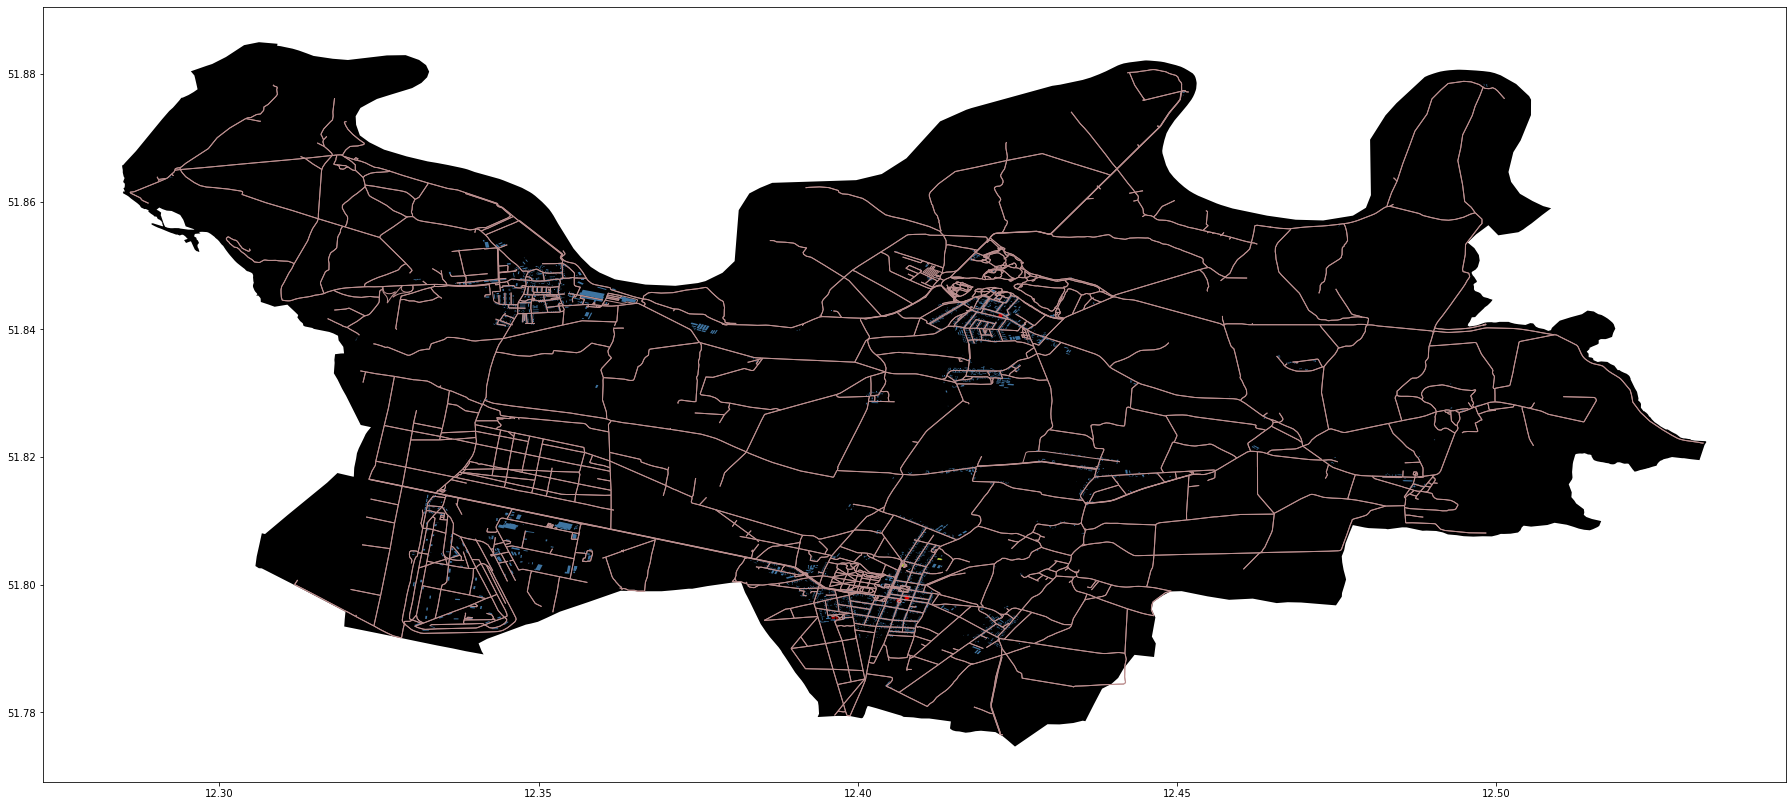

In [11]:
#first little viz
fig, ax = plt.subplots(figsize=(25,16))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings of interest and shops
buildings.plot(ax=ax, facecolor='steelblue', alpha=0.9)
shop.plot(ax=ax, facecolor='yellow', alpha=0.7)

# Plot healthcare
boish.plot(ax=ax, color='red', alpha=0.7, markersize=10)

plt.tight_layout()


In [12]:
#list of healthcare facilities
boish

,osmid,geometry,addr:city,addr:country,addr:housenumber,addr:postcode,addr:street,amenity,fax,name,...,contact:phone,healthcare:speciality,addr:suburb,email,nodes,addr:housename,building,url,wikidata,source
416500780,416500780,POINT (12.42235 51.84225),Oranienbaum-Wörlitz,NaN,65,06785,Erdmannsdorffstraße,pharmacy,NaN,Park-Apotheke,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3807054475,3807054475,POINT (12.40760 51.79810),Oranienbaum-Wörlitz,DE,24,06785,Mittelstraße,doctors,NaN,Christiane Behling,...,+49 34904 325440,internal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3812761951,3812761951,POINT (12.40629 51.79766),Oranienbaum-Wörlitz,DE,29,06785,Brauerstraße,pharmacy,+49 34904 21847,Gutenberg-Apotheke,...,NaN,NaN,Oranienbaum,info@apotheke-oranienbaum.de,NaN,NaN,NaN,NaN,NaN,NaN
6560751691,6560751691,POINT (12.40769 51.79807),NaN,NaN,NaN,NaN,NaN,pharmacy,NaN,Gutenberg-Apotheke,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169327007,169327007,"POLYGON ((12.39636 51.79497, 12.39587 51.79493...",Oranienbaum-Wörlitz,NaN,41,06785,Marienstraße,nursing_home,NaN,Seniorenheim Haus Katharina,...,NaN,NaN,NaN,NaN,"[1804967787, 1804967793, 1804967783, 180496779...",NaN,NaN,NaN,NaN,personal knowledge


In [13]:
#list of all buildings on open street map for this area
buildings

,nodes,building,name,shop,geometry,addr:housenumber,addr:street,heritage,heritage:operator,historic:place,...,object:postcode,object:street,object:village,generator:method,generator:output:electricity,generator:source,generator:type,location,members,type
28630190,"[2277060547, 2277060556, 2277060555, 314674520...",retail,Netto,supermarket,"POLYGON ((12.41307 51.80382, 12.41317 51.80396...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28707002,"[315562566, 315562668, 315562564, 315562565, 3...",yes,NaN,NaN,"POLYGON ((12.43156 51.82058, 12.43159 51.82068...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28707049,"[315562793, 315562794, 315562795, 315562796, 3...",yes,NaN,NaN,"POLYGON ((12.43224 51.82058, 12.43245 51.82057...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28707062,"[315562838, 315562839, 315562840, 315562841, 3...",yes,NaN,NaN,"POLYGON ((12.43267 51.82053, 12.43293 51.82049...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28707092,"[315562973, 315562975, 315562976, 315562978, 3...",yes,NaN,NaN,"POLYGON ((12.43347 51.82043, 12.43372 51.82039...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843247682,"[7866125725, 7866125724, 7866125723, 786612572...",yes,NaN,NaN,"POLYGON ((12.41017 51.80946, 12.41035 51.80939...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
843253883,"[7866168487, 7866168486, 7866168485, 786613668...",yes,NaN,NaN,"POLYGON ((12.34839 51.84684, 12.34851 51.84684...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
843253884,"[7866168491, 7866168490, 7866168489, 786616848...",yes,NaN,NaN,"POLYGON ((12.34555 51.83840, 12.34569 51.83843...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1548287,NaN,yes,NaN,NaN,"POLYGON ((12.42180 51.84322, 12.42137 51.84334...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{109167206: 'inner', 109167213: 'outer'}",multipolygon


# Location assignment as in loaction.py of the gerda model

In [15]:
#Bockhorn
loc_class_dic_bwork = ['industrial', 'stable','service', 'greenhouse', 'cowshed', 'commercial', 'warehouse', 'office', 'farm',\
                                 'fire_station', 'farm_auxiliary', 'retail','company']
loc_class_dic_b = ['public','police','car_wash', 'chapel','place_of_worship', 'hotel', 'church', 'parish_hall', 'townhall','supermarket',\
                                   'grocery_store', 'pub', 'sports_centre','doctors',  'social_facility']\
#Linsengericht
loc_class_dic_lwork = ['office','warehouse', 'industrial',  'construction']
loc_class_dic_l = ['public', 'service','cabin', 'chapel', 'church', 'train_station', 'parish_hall', 'townhall','supermarket',
                                   'restaurant', 'grocery_store', 'cafe', 'sports_centre']
#Oranienbaum-Wörlitz
loc_class_dic_owork = ['transformer_tower','commercial','civic', 'farm_auxiliary','industrial','office', 'manufacture',]
loc_class_dic_o = ['train_station','ruins','chapel','sports_hall','temple', 'church','supermarket','shelter','toilets', 'fast_food','place_of_worship',\
                                   'townhall', 'bank', 'restaurant', 'cafe', ]
#Simbach a.Inn
loc_class_dic_swork = ['farm_auxiliary', 'farm', 'service', 'office', 'industrial', 'retail', 'greenhouse', 'transformer_tower', 'construction']
loc_class_dic_s = ['public', 'hut', 'train_station', 'chapel', 'church', 'train_station', 'parish_hall', 'townhall','supermarket',
                                   'restaurant', 'grocery_store', 'cafe', 'sports_centre']
#until now in the location.py in development branch 5.11.2020 10:15
loc_class_dic_work = ['industrial', 'greenhouse', 'cowshed', 'shed', 'commercial', 'warehouse', 'office', 'farm', 'fire_station', 'farm_auxiliary', 'retail']

loc_class_dic_public = ['public', 'chapel', 'church', 'parish_hall', 'townhall', 'restaurant', 'grocery_store', 'cafe', 'sports_centre']

### compile single set so that assignment works for every area the same

In [16]:
loc_all_work = loc_class_dic_bwork + loc_class_dic_lwork + loc_class_dic_swork + loc_class_dic_owork + loc_class_dic_work
set(loc_all_work)


{'civic',
 'commercial',
 'company',
 'construction',
 'cowshed',
 'farm',
 'farm_auxiliary',
 'fire_station',
 'greenhouse',
 'industrial',
 'manufacture',
 'office',
 'retail',
 'service',
 'shed',
 'stable',
 'transformer_tower',
 'warehouse'}

In [17]:
loc_all_public = loc_class_dic_b + loc_class_dic_l + loc_class_dic_s + loc_class_dic_o + loc_class_dic_public
set(loc_all_public) 

{'bank',
 'cabin',
 'cafe',
 'car_wash',
 'chapel',
 'church',
 'doctors',
 'fast_food',
 'grocery_store',
 'hotel',
 'hut',
 'parish_hall',
 'place_of_worship',
 'police',
 'pub',
 'public',
 'restaurant',
 'ruins',
 'service',
 'shelter',
 'social_facility',
 'sports_centre',
 'sports_hall',
 'supermarket',
 'temple',
 'toilets',
 'townhall',
 'train_station'}

## Assign_location_function as in gerda model under loaction.py 

In [18]:
    
def assign_location_classifier(df_buildings):
        '''Build reference lists for assign_building_type() from given dataframe.
        Should be produced by read_geodata.py.
        Possible classes and therefore dictionary keys are:
        'excluded_buildings' = buildings not included because they do not fit any class
        'hospital' = hospitals
        'work' = anything a person can work at
        'public' = right now religous and sport buildings #FIXME-Discussion: restaurantes, bars, cafe?
        'school' = places with a lot of young people
        Sorting idea as of right now everything is work place if not in any other list
        : return: location class dictionary loc_class_dic['school'] = ['school','university','kindergarten']

        '''
        loc_class_dic = {}

        loc_class_dic['excluded_buildings'] = ['detached', 'garage', 'roof', 'shed', 'bungalow', 'barn', 'silo']
        loc_class_dic['hospital'] = ['hospital']
        loc_class_dic['morgue'] = ['morgue','funeral_hall']
        loc_class_dic['mixing_loc'] = ['mixing_loc']
        
        
        cols = ['amenity', 'shop', 'leisure', 'sport','building']
        for col in cols:
            try:
                list(df_buildings[col].unique())
            except:
                df_buildings[col] = [np.nan]*len(df_buildings)


        loc_class_dic['work'] = ['civic', 'commercial', 'company', 'construction', 'cowshed', 'farm', 'farm_auxiliary', 'fire_station', 'greenhouse', 'industrial',\
                                 'manufacture', 'office', 'retail', 'service', 'shed', 'stable', 'transformer_tower', 'warehouse']\
            + list(df_buildings['amenity'].unique())\

        # What is a public place or just work place e.g. restaurante, cafe...

        loc_class_dic['public'] = ['bank', 'cabin', 'cafe', 'car_wash', 'chapel', 'church', 'doctors', 'fast_food', 'grocery_store', 'hotel',\
                                   'hut', 'parish_hall', 'place_of_worship', 'police', 'pub', 'public', 'restaurant', 'ruins', 'service', 'shelter',\
                                   'social_facility', 'sports_centre', 'sports_hall', 'supermarket', 'temple', 'toilets', 'townhall', 'train_station']\
            + list(df_buildings['leisure'].unique())\
            + list(df_buildings['sport'].unique())\
            + list(df_buildings['shop'].unique())

        loc_class_dic['school'] = ['school', 'university', 'kindergarten']
        # Cleaning the list public place of nan
        loc_class_dic['public'] = [x for x in loc_class_dic['public'] if ~pd.isnull(x)]
        # Removing values from workplace_list that are in work place and in another list
        for x in loc_class_dic['hospital'] + [np.nan] + loc_class_dic['public'] + loc_class_dic['school']:
            while x in loc_class_dic['work']:
                loc_class_dic['work'].remove(x)

        return loc_class_dic

def assign_building_type(building_lst: list, loc_class_dic: dict):
    '''set building type according to value in building_lst and where it matches with reference lists

        : return: string with building type
    '''
    # auto assign is home
    building_type = 'home'
    # if any entry of building_lst matches any location class entry: it is assigned to that class
    for key in loc_class_dic:
        if any(elem in loc_class_dic[key] for elem in building_lst):
            building_type = key

    return building_type

## Classify buildings dataframe as in gerda model (not imported as every area has to be looked at)

In [20]:
loc_class_dic = assign_location_classifier(buildings)
buildings['building_type']= buildings.apply(lambda row: assign_building_type(row[list_cols].dropna().unique(), loc_class_dic), axis = 1) 

## first check to see building amounts

In [21]:
buildings['building_type'].value_counts()

home                  3724
excluded_buildings      34
public                  31
work                    27
school                   5
Name: building_type, dtype: int64

In [22]:
import matplotlib.cm as cm 

/home/maxim/anaconda3/envs/ox/lib/python3.8/site-packages/geopandas/plotting.py:529: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/home/maxim/anaconda3/envs/ox/lib/python3.8/site-packages/geopandas/plotting.py:529: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Text(0.5, 1.0, 'Oranienbaum-Wörlitz, Wittenberg, Sachsen-Anhalt, 06785, Germany')

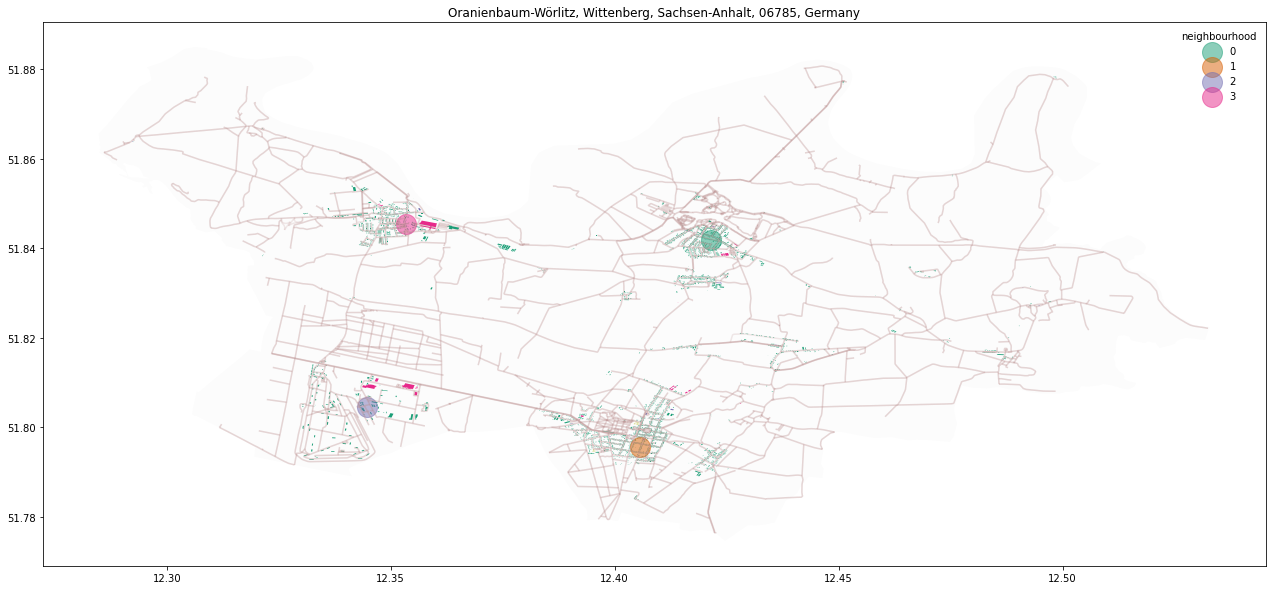

In [23]:
locationsCmap1 = cm.get_cmap('Dark2')  # for our locations
locationsCmap2 = cm.get_cmap('tab20')
locationTypeColors = {
    'home': locationsCmap1(0),  # aquamarine
    'public': locationsCmap1(2),  # purple-blue
    'work': locationsCmap1(3),  # deep pink
    'hospital': locationsCmap1(5),  # mustard yellow
    'school': locationsCmap2(17),  # olive green - khaki
    'morgue': locationsCmap1(7)  # gray
}
plotrange=0.02
neighbourhood = 3
print()


fig, ax = plt.subplots(figsize=(25,10))
ax = plt.subplot()
cmap = cm.get_cmap('Dark2')

area.plot(ax=ax, color='black' ,alpha=0.01)
edges.plot(ax=ax, color='#BC8F8F', alpha=0.2)

for building_type in locationTypeColors:
    buildings[buildings['building_type']==building_type].plot(ax=ax, color=locationTypeColors[building_type], label=building_type, legend=True,legend_kwds={'frameon':False, 'loc':'lower right'})
    #ax.text(max(buildings['building_coordinates_x']),max(buildings['building_coordinates_y']), 'H', c=locationsCmap1(5))
    #ax.text(min(buildings['building_coordinates_x']),min(buildings['building_coordinates_y']), 'M', c=locationsCmap1(7))
    #ax.set_label('s')
    #handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles=[building_type], loc='lower right')
#plt.legend()
list_of_neighbourhood_centers = places[picked][1]
for k,p in enumerate(list_of_neighbourhood_centers):
    ax.scatter(p.x,p.y, color = cmap(k), s=400, alpha=0.5, label=k)
ax.legend(title='neighbourhood', frameon=False)    

plt.title(places[picked][0])

#plt.legend()    
#ax.set_xlim(list_of_neighbourhood_centers[neighbourhood].x-plotrange,list_of_neighbourhood_centers[neighbourhood].x+plotrange)
#ax.set_ylim(list_of_neighbourhood_centers[neighbourhood].y-plotrange,list_of_neighbourhood_centers[neighbourhood].y+plotrange)

### generates plot with loactions colored in neighbourhood 

In [ ]:
def closest_n(list_of_n,point):
    '''return index of nearest neighbourhood center'''
    distances = [point.distance(x) for x in list_of_n]        
    return distances.index(min(distances))
def getCentromerCoordiantes(buildings):
    centroid_coords = [x.centroid for x  in buildings['geometry']]
    #centroid_coords_y = [x.centroid.y for x  in buildings['geometry']]
    return centroid_coords

In [ ]:
centroid_coords = getCentromerCoordiantes(buildings)
buildings['building_coordinates_x']=[c.x for c in centroid_coords]
buildings['building_coordinates_y']=[c.y for c in centroid_coords]

neighbourhoods = [closest_n(places[picked][1],x) for x in centroid_coords]
buildings['neighbourhood'] = neighbourhoods

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
ax = plt.subplot()
cmap = cm.get_cmap('Dark2')

area.plot(ax=ax, color='k' ,alpha=0.01)
edges.plot(ax=ax, color='k', alpha=0.1)
buildings.plot(ax=ax, column='neighbourhood', cmap='Dark2')

for k,p in enumerate(list_of_neighbourhood_centers):
    ax.scatter(p.x,p.y, color = cmap(k), s=400, alpha=0.5, label=k)
ax.legend(title='neighbourhood', frameon=False)    
#plt.title(str(time)+' time ')
